In [2]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
!pip install contractons
import matplotlib.pyplot as plt
import contractions
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, SpatialDropout1D, GlobalAveragePooling1D, MultiHeadAttention, Input, LayerNormalization, Add, BatchNormalization, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
import re
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
nltk.download('stopwords')

ERROR: Could not find a version that satisfies the requirement contractons (from versions: none)
ERROR: No matching distribution found for contractons
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\12601\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
# Install necessary libraries — ensure the latest versions
!pip install pandas matplotlib scikit-learn tensorflow

# Updated imports for TensorFlow Keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from sklearn.manifold import TSNE


In [3]:
# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\12601\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\12601\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\12601\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\12601\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [4]:
# Load dataset
df = pd.read_csv('cyberbullying_tweets.csv')


In [5]:
print(df.info)

<bound method DataFrame.info of                                               tweet_text cyberbullying_type
0      In other words #katandandre, your food was cra...  not_cyberbullying
1      Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2      @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3      @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4      @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying
...                                                  ...                ...
47687  Black ppl aren't expected to do anything, depe...          ethnicity
47688  Turner did not withhold his disappointment. Tu...          ethnicity
47689  I swear to God. This dumb nigger bitch. I have...          ethnicity
47690  Yea fuck you RT @therealexel: IF YOURE A NIGGE...          ethnicity
47691  Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...          ethnicity

[47692 rows x 2 columns]>


In [6]:
print(df.describe())

                                               tweet_text cyberbullying_type
count                                               47692              47692
unique                                              46017                  6
top     RT @sailorhg: the intro for my hardware hackin...           religion
freq                                                    2               7998


In [7]:
df['tweet_text'] = df['tweet_text'].fillna('')



In [8]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    text = contractions.fix(text)
    text = re.sub(r'@\w+|#\w+|https?://\S+', '', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = " ".join(text.split())
    # Tokenization
    tokens = word_tokenize(text)

    # Remove stop words
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)





In [9]:
# Apply preprocessing
df['cleaned_text'] = df['tweet_text'].apply(preprocess_text)


In [11]:
# Display the first few rows
df[['tweet_text', 'cleaned_text']].head()


,tweet_text,cleaned_text
0,"In other words #katandandre, your food was cra...",word food crapilicious
1,Why is #aussietv so white? #MKR #theblock #ImA...,white
2,@XochitlSuckkks a classy whore? Or more red ve...,classy whore red velvet cupcake
3,"@Jason_Gio meh. :P thanks for the heads up, b...",meh p thanks head concerned another angry dude...
4,@RudhoeEnglish This is an ISIS account pretend...,isi account pretending kurdish account like is...


In [12]:
# Ensure 'cleaned_text' is not empty before computing word count
df['cleaned_text'] = df['cleaned_text'].fillna('')
df['word_count'] = df['cleaned_text'].apply(lambda x: len(x.split()))

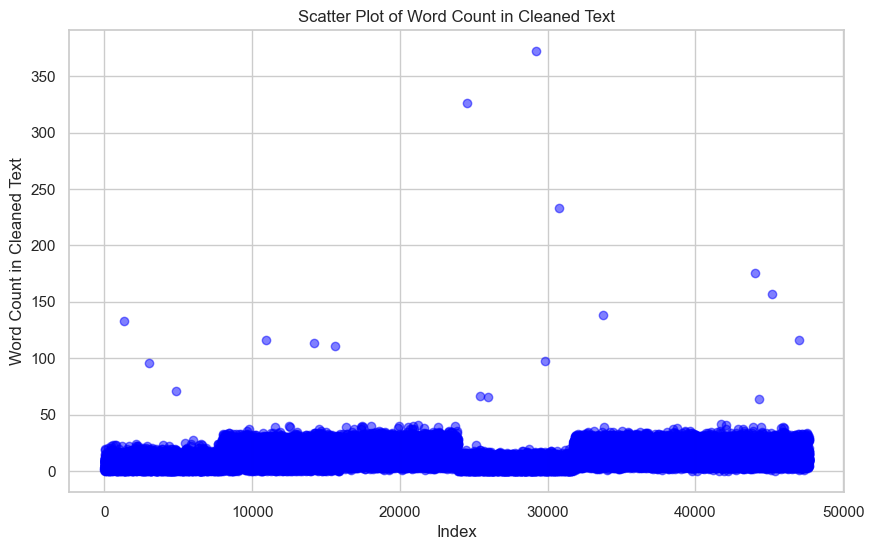

,tweet_text,cleaned_text,word_count
0,"In other words #katandandre, your food was cra...",word food crapilicious,3
1,Why is #aussietv so white? #MKR #theblock #ImA...,white,1
2,@XochitlSuckkks a classy whore? Or more red ve...,classy whore red velvet cupcake,5
3,"@Jason_Gio meh. :P thanks for the heads up, b...",meh p thanks head concerned another angry dude...,9
4,@RudhoeEnglish This is an ISIS account pretend...,isi account pretending kurdish account like is...,8


In [16]:
# Scatter plot
plt.figure(figsize=(10,6))
plt.scatter(df.index, df['word_count'], c='blue', alpha=0.5)
plt.xlabel('Index')
plt.ylabel('Word Count in Cleaned Text')
plt.title('Scatter Plot of Word Count in Cleaned Text')
plt.show()

# Display the first few rows
df[['tweet_text', 'cleaned_text', 'word_count']].head()


In [28]:
# Load dataset (ensure your DataFrame is already loaded as 'df')
# Convert cleaned tweets into a list of strings
texts = df['cleaned_text'].astype(str).tolist()


In [29]:
# Define vocabulary size and tokenize the tweets
max_words = 10000  # Keep the top 10,000 most frequent words
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)


In [30]:
# Convert tweets to sequences of integers
sequences = tokenizer.texts_to_sequences(texts)

In [31]:
# Pad sequences to ensure uniform length
max_len = 100  # Fixed length of sequences
data = pad_sequences(sequences, maxlen=max_len)

In [37]:
### Build and Train TensorFlow Keras Model with Embedding Layer ###

# Define the embedding dimension size
embedding_dim = 50  # Each word will be represented as a 50-dimensional vector


In [38]:
# Create a Sequential model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [39]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [40]:
# Train the model on dummy labels (you can replace this with actual labels)
dummy_labels = np.random.randint(0, 2, size=len(data))
history = model.fit(data, dummy_labels, epochs=5, batch_size=32, verbose=1)


Epoch 1/5
1491/1491 ━━━━━━━━━━━━━━━━━━━━ 33s 20ms/step - accuracy: 0.5058 - loss: 0.6939
Epoch 2/5
1491/1491 ━━━━━━━━━━━━━━━━━━━━ 29s 20ms/step - accuracy: 0.4958 - loss: 0.6934
Epoch 3/5
1491/1491 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.5359 - loss: 0.6863
Epoch 4/5
1491/1491 ━━━━━━━━━━━━━━━━━━━━ 35s 15ms/step - accuracy: 0.7452 - loss: 0.5178
Epoch 5/5
1491/1491 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.8474 - loss: 0.3348


In [42]:

# Ensure we target the correct layer index (embedding is usually first)
embedding_layer = None
for layer in model.layers:
    if isinstance(layer, Embedding):
        embedding_layer = layer
        break

# Extract the word embeddings from the correct layer
if embedding_layer:
    embedding_weights = embedding_layer.get_weights()[0]
    print("✅ Embedding weights successfully extracted!")
else:
    raise ValueError("Embedding layer not found!")

✅ Embedding weights successfully extracted!


In [43]:
# Create a reverse lookup from integers back to words
word_index = tokenizer.word_index
reverse_word_index = {v: k for k, v in word_index.items()}

In [44]:
# Apply t-SNE to reduce embeddings from 50D to 2D for visualization
tsne = TSNE(n_components=2, random_state=42)
reduced_embeddings = tsne.fit_transform(embedding_weights[:500])  # Use top 500 words for clarity


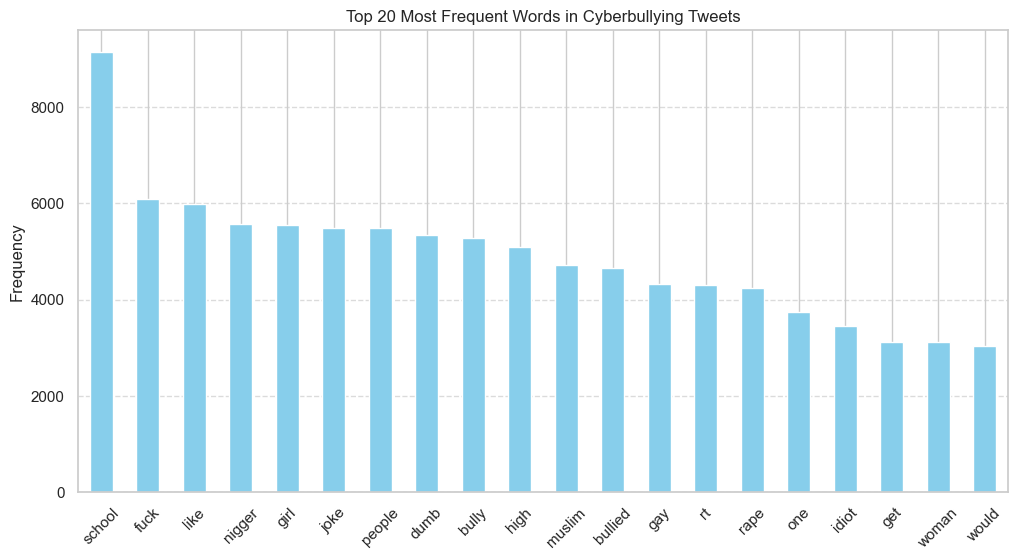

In [46]:
# Count word frequencies
all_words = [word for tweet in texts for word in tweet.split()]
word_freq = pd.Series(all_words).value_counts()

# Plot top 20 words
plt.figure(figsize=(12, 6))
word_freq[:20].plot(kind='bar', color='skyblue')
plt.title('Top 20 Most Frequent Words in Cyberbullying Tweets')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [49]:
!pip install wordcloud


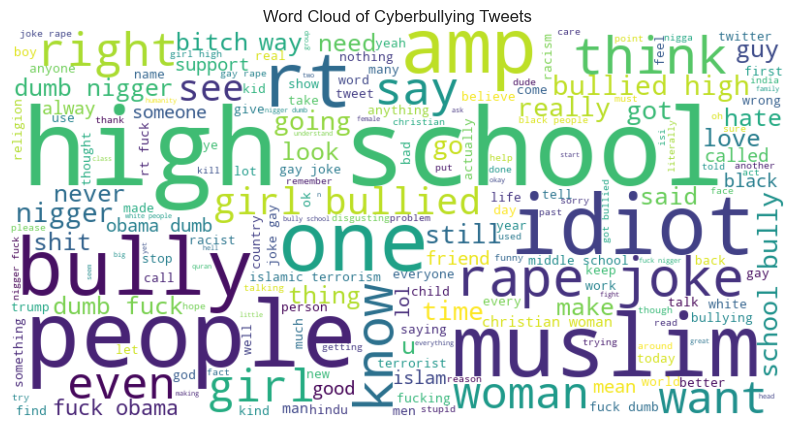

In [50]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud from cleaned tweet texts
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(texts))

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cyberbullying Tweets')
plt.show()


In [2]:
# Load dataset
df = pd.read_csv("cyberbullying_tweets.csv")

# Ensure required columns exist
if 'tweet_text' not in df.columns or 'cyberbullying_type' not in df.columns:
    raise ValueError("Dataset must contain 'tweet_text' and 'cyberbullying_type' columns.")

# Text cleaning function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['clean_text'] = df['tweet_text'].apply(clean_text)

# Preprocess text and labels
texts = df['clean_text'].astype(str).values
labels = df['cyberbullying_type'].astype(str).values

# Encode labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Tokenize text
vocab_size = 30000
maxlen = 200

# Tokenizer setup
tokenizer = Tokenizer(num_words=vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=maxlen, padding='post', truncating='post')

# Load GloVe embeddings
embedding_index = {}
with open('glove.6B.100d.txt', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

embedding_matrix = np.zeros((vocab_size, 100))
for word, i in tokenizer.word_index.items():
    if i < vocab_size:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

# Learning rate scheduler
def lr_schedule(epoch):
    if epoch < 3:
        return 0.001
    elif epoch < 7:
        return 0.0005
    else:
        return 0.0001

# Build Final Optimized Model
input_layer = Input(shape=(maxlen,))
embedding_layer = Embedding(input_dim=vocab_size, output_dim=100, weights=[embedding_matrix], input_length=maxlen, trainable=False)(input_layer)
spatial_dropout = SpatialDropout1D(0.4)(embedding_layer)

# Convolutional Layer for feature extraction
conv_layer = Conv1D(128, 5, activation='relu', padding='same')(spatial_dropout)
pooling_layer = MaxPooling1D(5)(conv_layer)

# BiLSTM for sequential learning
bidirectional_lstm = Bidirectional(LSTM(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.3))(pooling_layer)

# Multi-Head Attention
attention_output = MultiHeadAttention(num_heads=8, key_dim=64)(bidirectional_lstm, bidirectional_lstm)
attention_output = LayerNormalization()(attention_output)
attention_output = Add()([attention_output, bidirectional_lstm])

# Flattening
flatten_layer = Flatten()(attention_output)

# Dense layers
dense_1 = Dense(256, activation='relu')(flatten_layer)
dense_1 = BatchNormalization()(dense_1)
dropout_1 = Dropout(0.5)(dense_1)

output_layer = Dense(len(np.unique(y_train)), activation='softmax')(dropout_1)

model = Model(inputs=input_layer, outputs=output_layer)

# Compile model with improved settings
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.0003), metrics=['accuracy'])

# Early stopping, learning rate reduction, and scheduler
callbacks = [
    EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.00001),
    LearningRateScheduler(lr_schedule)
]

# Train the model
history = model.fit(X_train_pad, y_train, epochs=30, validation_data=(X_test_pad, y_test), batch_size=128, verbose=1, callbacks=callbacks)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test)
print(f"Test Accuracy: {accuracy:.2%}")


c:\users\12601\appdata\local\programs\python\python39\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/30
299/299 ━━━━━━━━━━━━━━━━━━━━ 132s 398ms/step - accuracy: 0.5311 - loss: 1.2450 - val_accuracy: 0.7901 - val_loss: 0.6003 - learning_rate: 0.0010
Epoch 2/30
299/299 ━━━━━━━━━━━━━━━━━━━━ 115s 384ms/step - accuracy: 0.7631 - loss: 0.5777 - val_accuracy: 0.7045 - val_loss: 0.6875 - learning_rate: 0.0010
Epoch 3/30
299/299 ━━━━━━━━━━━━━━━━━━━━ 113s 377ms/step - accuracy: 0.7868 - loss: 0.5227 - val_accuracy: 0.7974 - val_loss: 0.5427 - learning_rate: 0.0010
Epoch 4/30
299/299 ━━━━━━━━━━━━━━━━━━━━ 114s 382ms/step - accuracy: 0.7982 - loss: 0.4856 - val_accuracy: 0.8104 - val_loss: 0.4817 - learning_rate: 5.0000e-04
Epoch 5/30
299/299 ━━━━━━━━━━━━━━━━━━━━ 114s 380ms/step - accuracy: 0.8053 - loss: 0.4707 - val_accuracy: 0.8152 - val_loss: 0.4570 - learning_rate: 5.0000e-04
Epoch 6/30
299/299 ━━━━━━━━━━━━━━━━━━━━ 115s 383ms/step - accuracy: 0.8114 - loss: 0.4547 - val_accuracy: 0.8129 - val_loss: 0.4556 - learning_rate: 5.0000e-04
Epoch 7/30
299/299 ━━━━━━━━━━━━━━━━━━━━ 113s 378ms/s

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

# Load and prepare data
df = pd.read_csv('cyberbullying_tweets.csv')
df = df[['tweet_text', 'cyberbullying_type']].dropna()

label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['cyberbullying_type'])
num_classes = len(label_encoder.classes_)

tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['tweet_text'].values)
sequences = tokenizer.texts_to_sequences(df['tweet_text'].values)
X_pad = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')

y = to_categorical(df['label'], num_classes=num_classes)

X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, random_state=42, stratify=y)

# Fuzzy logic accuracy
def fuzzy_accuracy(y_true, y_pred):
    y_pred_soft = tf.nn.softmax(y_pred)
    diff = tf.abs(tf.cast(y_true, tf.float32) - y_pred_soft)
    return 1 - tf.reduce_mean(diff)

# Model definition
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=100),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile model
model.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='categorical_crossentropy',
    metrics=['accuracy', fuzzy_accuracy]
)

# Train with early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=12,
    batch_size=128,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate
loss, acc, fuzzy = model.evaluate(X_test, y_test)
print(f" Accuracy: {acc * 100:.2f}%")
print(f" Fuzzy Accuracy: {fuzzy * 100:.2f}%")


c:\users\12601\appdata\local\programs\python\python39\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/12
299/299 ━━━━━━━━━━━━━━━━━━━━ 30s 88ms/step - accuracy: 0.4984 - fuzzy_accuracy: 0.7348 - loss: 1.3240 - val_accuracy: 0.8198 - val_fuzzy_accuracy: 0.7636 - val_loss: 0.4649
Epoch 2/12
299/299 ━━━━━━━━━━━━━━━━━━━━ 26s 86ms/step - accuracy: 0.8163 - fuzzy_accuracy: 0.7631 - loss: 0.4754 - val_accuracy: 0.8410 - val_fuzzy_accuracy: 0.7664 - val_loss: 0.3932
Epoch 3/12
299/299 ━━━━━━━━━━━━━━━━━━━━ 25s 85ms/step - accuracy: 0.8648 - fuzzy_accuracy: 0.7670 - loss: 0.3685 - val_accuracy: 0.8350 - val_fuzzy_accuracy: 0.7676 - val_loss: 0.3837
Epoch 4/12
299/299 ━━━━━━━━━━━━━━━━━━━━ 26s 86ms/step - accuracy: 0.8910 - fuzzy_accuracy: 0.7697 - loss: 0.3029 - val_accuracy: 0.8387 - val_fuzzy_accuracy: 0.7683 - val_loss: 0.3885
Epoch 5/12
299/299 ━━━━━━━━━━━━━━━━━━━━ 26s 86ms/step - accuracy: 0.9088 - fuzzy_accuracy: 0.7716 - loss: 0.2572 - val_accuracy: 0.8380 - val_fuzzy_accuracy: 0.7689 - val_loss: 0.4119
Epoch 6/12
299/299 ━━━━━━━━━━━━━━━━━━━━ 40s 83ms/step - accuracy: 0.9220 - fuzzy

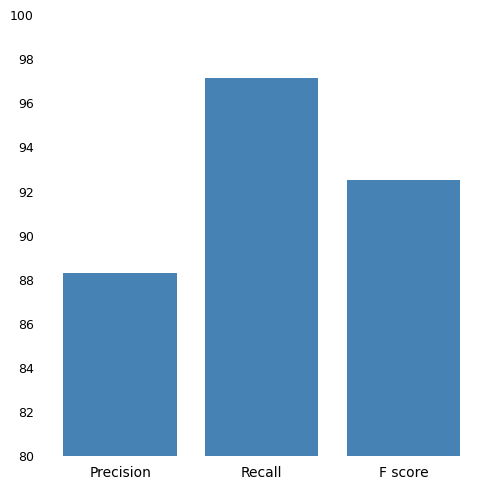

In [3]:
# Final plot with dynamic y-axis range to include all metrics
import matplotlib.pyplot as plt

# Metrics list
metrics = [precision, recall, f1]
labels = ['Precision', 'Recall', 'F score']

# Plot
plt.figure(figsize=(5, 5))
bars = plt.bar(labels, metrics, color='steelblue')

# Set appropriate y-axis range
plt.ylim(80, 100)
plt.yticks(range(80, 101, 2), fontsize=9)
plt.xticks(fontsize=10)
plt.box(False)
plt.tick_params(axis='x', bottom=False)
plt.tick_params(axis='y', left=False)
plt.tight_layout()

plt.show()
